# 1. Exploring the Mie particle database

This notebook shows how to explore the Mie particle databases available in the `./database` folder. 

$$ \mathcal{U}^{\mathrm{Mie}} = \mathcal{C}^{\mathrm{Mie}} \epsilon \left[ \left(\frac{\sigma}{r}\right)^{\lambda_r} -  \left(\frac{\sigma}{r}\right)^{\lambda_a} \right] $$

The following files are available:
- `mieparticle-data.csv`: First- and second-order derivative properties obtained in a wide range of density and temperature using molecular dynamics simulations.
- `mieparticle-second-virial.csv`: The second virial coefficient was obtained analytically.
- `mieparticle-vle.csv`: Vapor-liquid equilibria data was obtained using molecular dynamics simulations and the temperature quench method.
- `mieparticle-vap.csv`: Vaporization enthalpy and internal energy obtained from molecular dynamics simulations.
- `mieparticle-sle.csv`: Solid-liquid equilibria data obtained using the freeze method.
- `mieparticle-melting.csv`: Melting enthalpy and internal energy obtained from molecular dynamics simulations.

All properties in the database are reported in reduced units, equivalent to set $\epsilon$, $\sigma$, and $k_b$ to one. Refer to the main article or this [wikipedia article](https://en.wikipedia.org/wiki/Lennard-Jones_potential#Dimensionless_(reduced_units)) for further information.

First, we need to upload the required packages:
- **numpy**: numerical python
- **pandas**: working with data frames
- **matplotlib**: plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

-------
### PVT thermophysical properties

The `mieparticle-data.csv` file contains the first- and second-order properties used to train and test the FE-ANN(s) EoS. Some properties are listed below.

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `rho*`: set reduced density
- `T*`: set reduced temperature

**Molecular dynamics results:**

- `T_ad`: simulation temperature
- `P_ad`: simulation pressure
- `TotEn_ad`: simulation total internal energy
- `Cv`: isochoric heat capacity
- `ThermalPressureCoeff`: thermal pressure coefficient
- `Cp`: isobaric heat capacity
- `ThermalExpansionCoeff`: thermal expansion coefficient
- `IsothermalCompressibility`: isothermal compressibility
- `JouleThomson`: Joule Thomson coefficient

**Notes:**
- The columns `is_fluid` and `is_solid` identify if a data point is a fluid or a crystal
- Columns with `_nvt` refer to a property obtained in the NVT ensemble
- columns with `_npt` refer to a property obtained in the NPT ensemble 
- Columns with `_std_` refer to the standard deviation of the property

In [2]:
folder_to_read = './database'
filename = 'mieparticle-data.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_data = pd.read_csv(file_to_read)
df_data.head()

,lr,la,rho*,T*,T_ad,P_ad,TotEn_ad,Cv_nvt,ThermalPressureCoeff_nvt,Cp_npt,...,TotEn_std_ad,Cv_std_nvt,ThermalPressureCoeff_std_nvt,Cp_std_npt,ThermalExpansionCoeff_std_npt,IsothermalCompressibility_std_npt,Cv_std_npt,JouleThomson_std_npt,rho*_npt,rho*_std_npt
0,7.0,6.0,0.000001,0.91,0.910076,9.098467e-07,1.36477,1.500006,1.000008e-06,NaN,...,0.000000e+00,1.743433e-07,9.530849e-12,NaN,0.010496,4660.273941,NaN,NaN,9.996225e-07,1.552907e-08
1,7.0,6.0,0.000001,1.39,1.389966,1.389620e-06,2.08443,1.500003,9.999914e-07,2.517727,...,0.000000e+00,5.437157e-08,6.223554e-12,0.028522,0.010743,5506.407817,0.007855,NaN,1.000043e-06,1.558153e-08
2,7.0,6.0,0.000001,1.87,1.870108,1.869648e-06,2.80447,1.500001,9.999910e-07,2.672514,...,4.441658e-16,2.498005e-08,6.452221e-12,0.024310,0.006222,3630.032663,0.005834,NaN,1.000112e-06,1.600205e-08
3,7.0,6.0,0.000001,2.34,2.340187,2.339612e-06,3.50942,1.500001,1.000001e-06,NaN,...,8.883316e-16,1.190847e-07,3.002746e-12,NaN,0.007108,3273.458150,NaN,NaN,1.000116e-06,1.565180e-08
4,7.0,6.0,0.000001,2.82,2.819744,2.819050e-06,4.22857,1.500001,1.000002e-06,2.550711,...,8.883316e-16,3.557034e-08,4.679006e-12,0.024951,0.002171,1895.185535,NaN,NaN,9.999371e-07,1.563855e-08


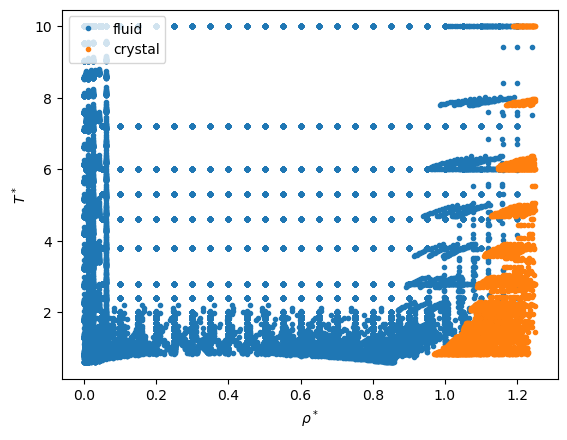

In [3]:
# plotting the Temperature-density distribution
plt.plot(df_data[df_data['is_fluid']]['rho*'], df_data[df_data['is_fluid']]['T*'], '.', label='fluid')
plt.plot(df_data[df_data['is_solid']]['rho*'], df_data[df_data['is_solid']]['T*'], '.', label='crystal')
plt.xlabel(r'$\rho^*$')
plt.ylabel(r'$T^*$')
plt.legend(loc='upper left')

----------
### Second virial coefficient

The `mieparticle-second-virial.csv` file contains the second virial coefficient and its temperature derivative used to train and test the FE-ANN(s) EoS. Some properties are listed below.

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `rho*`: set reduced density
- `T*`: set reduced temperature

**Values:**
- `B*`: second virial coefficient
- `dB*_dT*`: derivative of second virial coefficient w.r.t. the temperature

In [4]:
folder_to_read = './database'
filename = 'mieparticle-second-virial.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_virial = pd.read_csv(file_to_read)
df_virial.head()

,lr,la,rho*,T*,B*,dB*_dT*
0,7,6,0,1.000000,-9.928439,14.942596
1,7,6,0,1.186949,-7.677454,9.698002
2,7,6,0,1.373897,-6.160683,6.785280
3,7,6,0,1.560846,-5.071182,5.004043
4,7,6,0,1.747795,-4.251917,3.836852


-------
### Vapor-liquid equilibria

The `mieparticle-vle.csv` contains data for vapor-liquid data obtained using the temperature quench method in molecular dynamics simulations. 

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `T*`: set reduced temperature

**Values:**
- `P*`: equilibrium pressure
- `rhov*`: equilibrium vapor density
- `rhol*`: equilibrium liquid density

In [5]:
folder_to_read = './database'
filename = 'mieparticle-vle.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_vle = pd.read_csv(file_to_read)
df_vle.head()

,lr,la,T*,P*,rhov*,rhol*
0,7.0,6.0,0.749974,0.000002,0.000110,0.915221
1,7.0,6.0,0.769964,0.000091,0.000131,0.909593
2,7.0,6.0,0.899920,0.000747,0.000860,0.873697
3,7.0,6.0,0.919989,0.000858,0.001015,0.867923
4,7.0,6.0,1.050032,0.002939,0.003065,0.831214


Similarly, the `mieparticle-vap.csv` use the computed equilibrium densities to obtain the vaporization enthalpy and internal energy change.

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `T*`: set reduced temperature

**Values:**
- `P*`: equilibrium pressure
- `rhov*`: equilibrium vapor density
- `rhol*`: equilibrium liquid density
- `dHvap*`: vaporization enthalpy
- `dUvap*`: vaporization internal energy change

In [6]:
folder_to_read = './database'
filename = 'mieparticle-vap.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_vap = pd.read_csv(file_to_read)
df_vap.head()

,lr,la,T*,P*,rhov*,rhol*,dHvap*,dUvap*
0,7.0,6.0,0.750305,0.000082,0.000110,0.915221,9.690470,8.941645
1,7.0,6.0,0.770104,0.000101,0.000131,0.909593,9.652755,8.884317
2,7.0,6.0,0.900516,0.000767,0.000860,0.873697,9.368144,8.477297
3,7.0,6.0,0.920068,0.000924,0.001015,0.867923,9.329978,8.421070
4,7.0,6.0,1.050198,0.003124,0.003057,0.830985,9.019327,8.001202


-------
### Solid-liquid equilibria

The `mieparticle-sle.csv` contains solid-liquid equilibrium data obtained using the freeze method in molecular dynamics simulations. 

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `T*`: set reduced temperature

**Values:**
- `P*`: equilibrium pressure
- `rhol*`: equilibrium liquid density
- `rhos*`: equilibrium solid density

In [7]:
folder_to_read = './database'
filename = 'mieparticle-sle.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_sle = pd.read_csv(file_to_read)
df_sle.head()

,lr,la,T*,P*,rhol*,rhos*
0,7.0,6.0,0.819992,1.058440,0.941059,1.007612
1,7.0,6.0,0.861033,1.726429,0.955766,1.019687
2,7.0,6.0,0.893983,2.270974,0.967576,1.033150
3,7.0,6.0,0.930008,2.892676,0.977972,1.045453
4,7.0,6.0,1.036980,4.848242,1.011867,1.066486


Similarly, the `mieparticle-melting.csv` uses the computed equilibrium densities to obtain the melting enthalpy and internal energy change.

**Descriptors:**
- `lr`: repulsive exponent of the Mie potential
- `la`: attractive exponent of the Mie potential
- `T*`: set reduced temperature

**Values:**
- `P*`: equilibrium pressure
- `rhol*`: equilibrium liquid density
- `rhos*`: equilibrium solid density
- `dHmelting*`: melting enthalpy
- `dUmelting*`: melting internal energy change


In [8]:
folder_to_read = './database'
filename = 'mieparticle-melting.csv'

file_to_read = os.path.join(folder_to_read, filename)
df_melting = pd.read_csv(file_to_read)
df_melting.head()

,lr,la,T*,P*,rhol*,rhos*,dHmelting*,dUmelting*
0,11,6,0.90,2.658778,0.906778,0.989605,1.170995,0.925415
1,11,6,1.00,4.081831,0.927632,1.007801,1.264421,0.913968
2,11,6,1.03,4.514041,0.933067,1.013048,1.294583,0.912692
3,12,6,0.90,2.646343,0.900238,0.989043,1.218367,0.954768
4,12,6,1.00,4.023711,0.919555,1.005691,1.317498,0.942678
